## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\Dick\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dick\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dick\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dick\Anaconda3

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.9, 0.5, 0.1, 0]

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for _momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (_momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=_momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(_momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with momentum = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8629 - acc: 0.3333 - val_loss: 1.8008 - val_acc: 0.3639
Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6497 - acc: 0.4161 - val_loss: 1.6578 - val_acc: 0.4163
Epoch 3/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5584 - acc: 0.4481 - val_loss: 1.8222 - val_acc: 0.3709
Epoch 4/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5004 - acc: 0.4679 - val_loss: 1.5064 - val_acc: 0.4695
Epoch 5/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.4427 - acc: 0.4885 - val_loss: 1.5406 - val_acc: 0.4559
Epoch 6/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.4007 - acc: 0.5047 - val_loss: 1.4451 - val_acc: 0.4883
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.3635 - acc: 0.5180 - val_loss: 1.4057 - 

Epoch 2/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8136 - acc: 0.3579 - val_loss: 1.8665 - val_acc: 0.3364
Epoch 3/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7437 - acc: 0.3818 - val_loss: 1.7019 - val_acc: 0.4030
Epoch 4/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6931 - acc: 0.4018 - val_loss: 1.6741 - val_acc: 0.3988
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6508 - acc: 0.4178 - val_loss: 1.6582 - val_acc: 0.4147
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6218 - acc: 0.4289 - val_loss: 1.6049 - val_acc: 0.4288
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5835 - acc: 0.4410 - val_loss: 1.6869 - val_acc: 0.3849
Epoch 8/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5598 - acc: 0.4497 - val_loss: 1.5368 - val_acc: 0.4605
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 132us/step - loss: 1.8014 - acc: 0.3641 - val_loss: 1.7711 - val_acc: 0.3692
Epoch 4/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7522 - acc: 0.3813 - val_loss: 1.7808 - val_acc: 0.3706
Epoch 5/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.7180 - acc: 0.3943 - val_loss: 1.7879 - val_acc: 0.3646
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.6897 - acc: 0.4056 - val_loss: 1.6966 - val_acc: 0.3959
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6598 - acc: 0.4168 - val_loss: 1.6603 - val_acc: 0.4103
Epoch 8/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6365 - acc: 0.4234 - val_loss: 1.6521 - val_acc: 0.4132
Epoch 9/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6178 - acc: 0.4291 - val_loss: 1.7150 - val_acc: 0.3885
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 132us/step - loss: 1.7672 - acc: 0.3788 - val_loss: 1.7852 - val_acc: 0.3530
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7302 - acc: 0.3909 - val_loss: 1.7251 - val_acc: 0.3908
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7053 - acc: 0.4002 - val_loss: 1.7022 - val_acc: 0.3999
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6763 - acc: 0.4110 - val_loss: 1.6738 - val_acc: 0.4078
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6529 - acc: 0.4182 - val_loss: 1.6644 - val_acc: 0.4064
Epoch 9/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6333 - acc: 0.4268 - val_loss: 1.6239 - val_acc: 0.4250
Epoch 10/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6166 - acc: 0.4339 - val_loss: 1.7734 - val_acc: 0.3722
Epoch 11/50
50000/50000 [===================

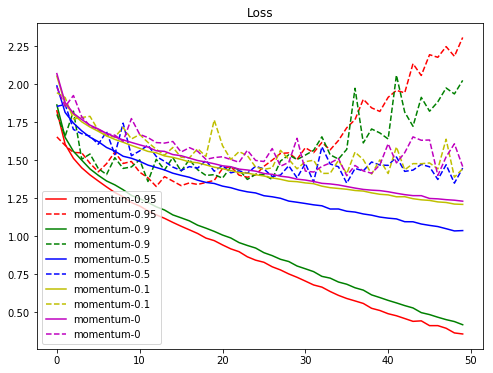

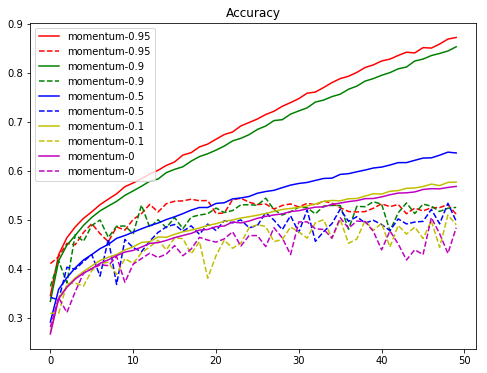

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for _momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (_momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=_momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(_momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with momentum = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.9000 - acc: 0.3153 - val_loss: 1.7135 - val_acc: 0.3985
Epoch 2/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6801 - acc: 0.4020 - val_loss: 1.6479 - val_acc: 0.4150
Epoch 3/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6046 - acc: 0.4274 - val_loss: 1.5507 - val_acc: 0.4466
Epoch 4/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5373 - acc: 0.4542 - val_loss: 1.5464 - val_acc: 0.4543
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4928 - acc: 0.4698 - val_loss: 1.5053 - val_acc: 0.4670
Epoch 6/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4558 - acc: 0.4819 - val_loss: 1.4643 - val_acc: 0.4777
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4211 - acc: 0.4962 - val_loss: 1.4938 - 

Epoch 2/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8044 - acc: 0.3622 - val_loss: 1.8194 - val_acc: 0.3569
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7287 - acc: 0.3914 - val_loss: 1.7056 - val_acc: 0.3912
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6691 - acc: 0.4111 - val_loss: 1.6627 - val_acc: 0.4088
Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6279 - acc: 0.4287 - val_loss: 1.6155 - val_acc: 0.4284
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5917 - acc: 0.4403 - val_loss: 1.6165 - val_acc: 0.43041.5924 - ac
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5629 - acc: 0.4492 - val_loss: 1.6030 - val_acc: 0.4283
Epoch 8/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5308 - acc: 0.4585 - val_loss: 1.5616 - val_acc: 0.4354
Epoch 9/50
50000/50000 

50000/50000 [==============================] - 6s 125us/step - loss: 1.8038 - acc: 0.3620 - val_loss: 1.7881 - val_acc: 0.3642
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7494 - acc: 0.3847 - val_loss: 1.7588 - val_acc: 0.3728
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7161 - acc: 0.3978 - val_loss: 1.7336 - val_acc: 0.3877c
Epoch 6/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.6859 - acc: 0.4087 - val_loss: 1.8010 - val_acc: 0.3624
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6594 - acc: 0.4163 - val_loss: 1.6651 - val_acc: 0.4133
Epoch 8/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6346 - acc: 0.4264 - val_loss: 1.7436 - val_acc: 0.3784
Epoch 9/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6096 - acc: 0.4362 - val_loss: 1.6236 - val_acc: 0.4226
Epoch 10/50
50000/50000 [===================

50000/50000 [==============================] - 7s 137us/step - loss: 1.7604 - acc: 0.3829 - val_loss: 1.7620 - val_acc: 0.3688
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.7245 - acc: 0.3948 - val_loss: 1.7062 - val_acc: 0.3982
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6876 - acc: 0.4061 - val_loss: 1.8430 - val_acc: 0.3419
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6653 - acc: 0.4149 - val_loss: 1.7135 - val_acc: 0.3812
Epoch 8/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6428 - acc: 0.4231 - val_loss: 1.7021 - val_acc: 0.3911
Epoch 9/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6198 - acc: 0.4306 - val_loss: 1.6381 - val_acc: 0.4263
Epoch 10/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6013 - acc: 0.4372 - val_loss: 1.5919 - val_acc: 0.4419
Epoch 11/50
50000/50000 [===================

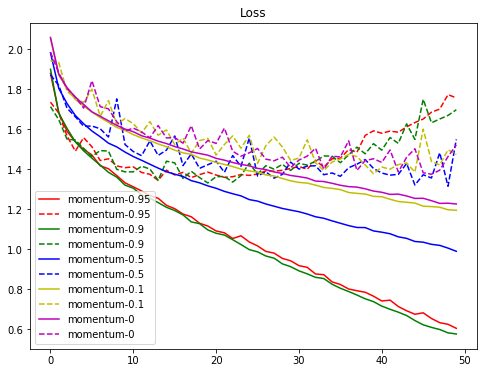

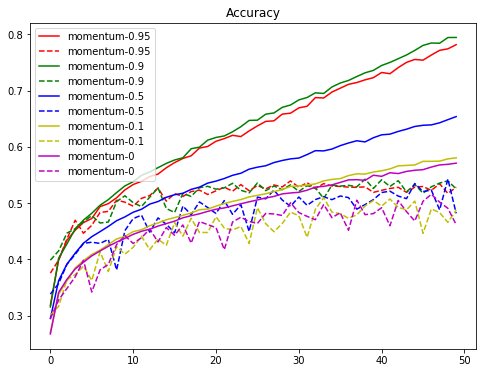

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
# 有設定nesterov為True的model表現較好